In [ ]:
# feature engineering of numerical variables



In [1]:
import pandas as pd

data = pd.read_csv("sample_data/california_housing_train.csv")
data_test = pd.read_csv("sample_data/california_housing_test.csv")

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
# performng normalization of numerical features

from sklearn.preprocessing import MinMaxScaler


In [6]:
#trying to predict
target = data['median_house_value']
# the rest are features
features = data.drop(['median_house_value'], axis = 1)

# the same for our test data
features_test = data_test.drop(['median_house_value'], axis = 1)
target_test = data_test['median_house_value']

In [7]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [8]:
#data normalization with sklearn

from sklearn.preprocessing import MinMaxScaler

# create normalization object from scikit learn package, and "fit" it to the features in hand -> calculating the min, max values in each column
norm = MinMaxScaler().fit(features)
norm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
# here we make the normalization
features_normalized = norm.transform(features)
features_normalized_test = norm.transform(features_test)


In [10]:
# turnng the normalized features into a dataframe
features_normalized = pd.DataFrame(features_normalized, columns = features.columns)

In [11]:
features_normalized.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281


In [12]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


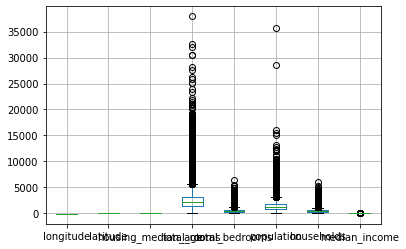

In [13]:
features.boxplot()

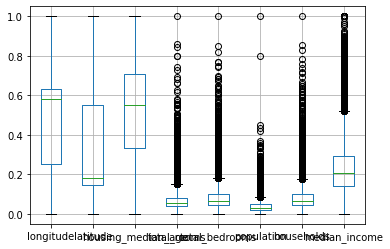

In [14]:
features_normalized.boxplot()

In [16]:
# standardiztion

from sklearn.preprocessing import StandardScaler

# create standardization object
scale = StandardScaler().fit(features)

In [17]:
features_standard = scale.transform(features)
features_standard_test = scale.transform(features_test)

In [18]:
features_standard = pd.DataFrame(features_standard, columns = features.columns)
features_standard_test = pd.DataFrame(features_standard_test, columns = features.columns)

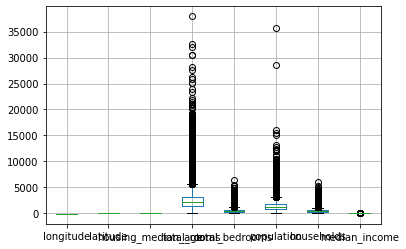

In [19]:
features.boxplot()

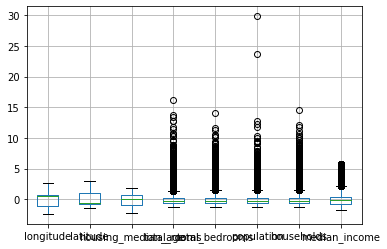

In [20]:
features_standard.boxplot()

In [22]:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=40)
rmse = []
features
train_X = [features,features_normalized,features_standard]
test_X = [features_test,features_normalized_test,features_standard_test]

In [23]:
#raw model
import numpy as np
from sklearn.metrics import r2_score

r2 = []
# fittin the model on raw data
knn.fit(train_X[0], target)
# testing algorithm on raw test
pred = knn.predict(test_X[0])

#rmse.append(np.sqrt(mean_squared_error(target_test,pred)))
r2.append(r2_score(target_test,pred))

# using normalization

# once you run this line of code you habe a trained model inside the object knn
knn.fit(train_X[1], target)
pred = knn.predict(test_X[1])
#rmse.append(np.sqrt(mean_squared_error(target_test,pred)))
r2.append(r2_score(target_test,pred))

print(knn.predict([[0.2,	0.25,	0.352941,	0.8,	0.794848,	0.031559,	0.175974,	0.091040]]))

# using standardization

knn.fit(train_X[2], target)
pred = knn.predict(test_X[2])
#rmse.append(np.sqrt(mean_squared_error(target_test,pred)))
r2.append(r2_score(target_test,pred))

[220687.5]


In [24]:
# R^2 in regression algos is equivalent to the step of calculating accuracy in classification
r2

[0.3036415981739289, 0.6713068389205017, 0.6801161263896436]

In [ ]:
# correlation thresholds

features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,0.000000e+00,7.771561e-16,3.094747e-15,-5.551115e-16,-6.938894e-17,4.440892e-16,9.714451e-17,-1.127570e-16
latitude,7.771561e-16,0.000000e+00,-4.649059e-16,3.816392e-16,1.942890e-16,2.498002e-16,6.383782e-16,2.775558e-17
housing_median_age,3.094747e-15,-4.649059e-16,0.000000e+00,1.193490e-14,1.387779e-15,6.716849e-15,8.937295e-15,1.249001e-15
total_rooms,-5.551115e-16,3.816392e-16,1.193490e-14,0.000000e+00,-3.774758e-15,5.551115e-16,6.217249e-15,1.026956e-15
total_bedrooms,-6.938894e-17,1.942890e-16,1.387779e-15,-3.774758e-15,0.000000e+00,8.104628e-15,7.438494e-15,-1.769418e-16
population,4.440892e-16,2.498002e-16,6.716849e-15,5.551115e-16,8.104628e-15,0.000000e+00,-9.103829e-15,1.485357e-17
households,9.714451e-17,6.383782e-16,8.937295e-15,6.217249e-15,7.438494e-15,-9.103829e-15,0.000000e+00,1.214306e-16
median_income,-1.127570e-16,2.775558e-17,1.249001e-15,1.026956e-15,-1.769418e-16,1.485357e-17,1.214306e-16,0.000000e+00


In [ ]:
features_normalized.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


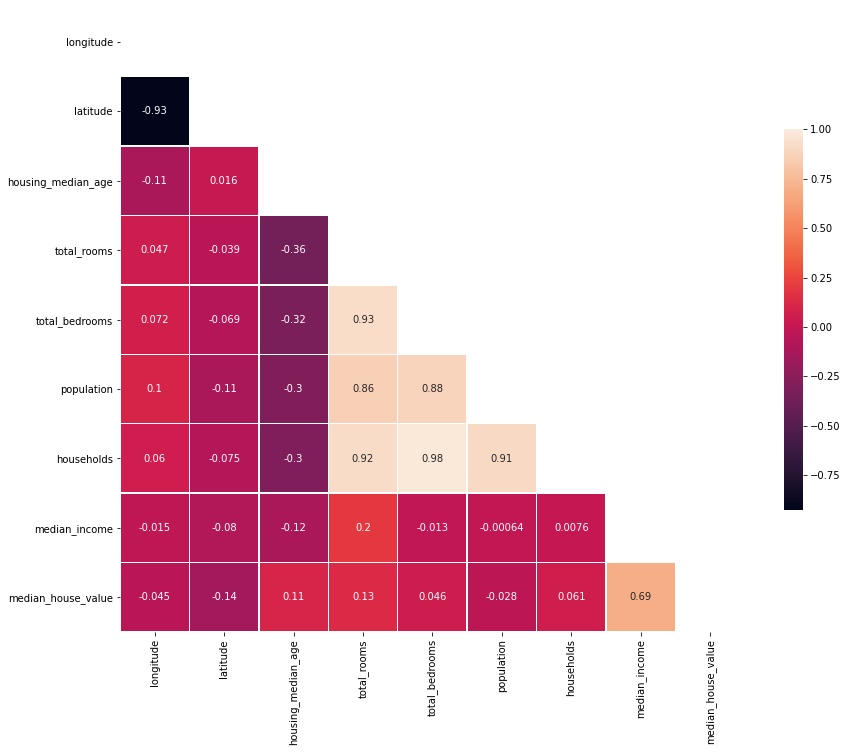

In [ ]:
#A very common way to visualize the results discussed above is to create a correlation matrix. This is shown below. Only 
# the lower triangular component of the matrix is shown due to the fact that the upper and lower (triangular) parts of the matrix
# are equal
import matplotlib.pyplot as plt
import seaborn as sn

corr=data.corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
# correlation threshold

# list of columns to remove based on threshold
to_remove = [column for column in abs(data.corr()['median_house_value'])<0.1]
data.corr()[to_remove].index
df = data.drop(data.corr()[to_remove].index, axis = 1)

to_remove

[True, False, False, False, True, True, True, False, False]

In [ ]:
df

,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,34.19,15.0,5612.0,1.4936,66900.0
1,34.40,19.0,7650.0,1.8200,80100.0
2,33.69,17.0,720.0,1.6509,85700.0
3,33.64,14.0,1501.0,3.1917,73400.0
4,33.57,20.0,1454.0,1.9250,65500.0
...,...,...,...,...,...
16995,40.58,52.0,2217.0,2.3571,111400.0
16996,40.69,36.0,2349.0,2.5179,79000.0
16997,41.84,17.0,2677.0,3.0313,103600.0
16998,41.80,19.0,2672.0,1.9797,85800.0


In [ ]:
# Finally!!! One hot encoding

In [ ]:
data = pd.read_csv('housing_prices.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# line of code to only keep categorical variables

data_categorical = data.select_dtypes(exclude = ['number','bool_'])
data_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# let's do a brute force one hot encoding, without thinking too much

pd.get_dummies(data_categorical)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# use goodness of fit tests to delete categories

# use ANOVA to delete specific values within a categorical variable



In [ ]:
# simple example of one hot encoding

# Turns all the possible value of a column into true/false variables
pd.get_dummies(data_categorical['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [ ]:
# let's remember how to perform chi squared tests to kill dependent features

# create the contingency table
# test if Sale condition and lot confi are independe

contingency = data.pivot_table(index = 'Neighborhood', columns = 'SaleCondition', values = '1stFlrSF', aggfunc='count', fill_value = 0)
contingency

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


In [ ]:
from scipy import stats

stats.chi2_contingency(contingency)
# big p-value means i accept the null hypothesis -> the variables are independent of each other

(470.43038149230597,
 5.576778295496307e-43,
 120,
 array([[1.17602740e+00, 4.65753425e-02, 1.39726027e-01, 2.32876712e-01,
         1.39493151e+01, 1.45547945e+00],
        [1.38356164e-01, 5.47945205e-03, 1.64383562e-02, 2.73972603e-02,
         1.64109589e+00, 1.71232877e-01],
        [1.10684932e+00, 4.38356164e-02, 1.31506849e-01, 2.19178082e-01,
         1.31287671e+01, 1.36986301e+00],
        [4.01232877e+00, 1.58904110e-01, 4.76712329e-01, 7.94520548e-01,
         4.75917808e+01, 4.96575342e+00],
        [1.93698630e+00, 7.67123288e-02, 2.30136986e-01, 3.83561644e-01,
         2.29753425e+01, 2.39726027e+00],
        [1.03767123e+01, 4.10958904e-01, 1.23287671e+00, 2.05479452e+00,
         1.23082192e+02, 1.28424658e+01],
        [3.52808219e+00, 1.39726027e-01, 4.19178082e-01, 6.98630137e-01,
         4.18479452e+01, 4.36643836e+00],
        [6.91780822e+00, 2.73972603e-01, 8.21917808e-01, 1.36986301e+00,
         8.20547945e+01, 8.56164384e+00],
        [5.46506849e+00, 2.16